# Primer Ejercicio: 
En el primer ejercicio recibiremos 2 cadenas y el objetivo es crear un algoritmo que pueda ordenarlos lexicográficamente.

In [26]:
def comparar_cadenas_lexicograficas(cadena1, cadena2):
    
    # Con el metodo isalpha, comprobamos que cada uno de los caracteres sea una letra
    letras1 = [c.isalpha() for c in cadena1]
    letras2 = [c.isalpha() for c in cadena2]
    
    # Validaciones, tipo de dato, longitud, que los caracteres sean exclusivamente letras, que estén en mayusculas y ambas cadenas tengan la misma longitud
    if (type(cadena1) != str or type(cadena2) != str):
        raise TypeError("Ambos parametros deben ser cadenas!")
    
    if (len(cadena1) == 0 or len(cadena2) == 0):
        raise ValueError("Las cadenas no pueden estar vacias!")
    
    if (not all(letras1) or not all(letras2)):
        raise ValueError("Todos los caracteres deben ser letras")
    
    if (cadena1 != cadena1.upper() or cadena2 != cadena2.upper()):
        raise ValueError("Ambas cadenas deben contar solo con letras mayusculas!")
    
    if (len(cadena1) != len(cadena2)):
        raise ValueError("Ambas cadenas deben tener la misma longitud")
    
    # Obtenemos el largo de las cadenas
    longitud_cadena = len(cadena1)
    
    # Recorremos y comparamos cada uno de los caracteres de ambas cadenas
    for i in range(longitud_cadena):
        if (cadena1[i] < cadena2[i]):
            return "-1"
        elif (cadena2[i] < cadena1[i]):
            return "1"
    
    # Si la función no retorno nada dentro del for, significa que ambas cadenas son iguales, retornamos "0"
    return "0"

Este algoritmo devuelve `1` si la primera cadena tiene un valor mayor, `-1` si la segunda tiene un valor mayor y `0` si ambas son iguales.

Entre las distintas validaciones las más importantes son las siguientes:  
Validar que todos los caracteres de ambas cadenas sean letras:
```python
    letras1 = [c.isalpha() for c in cadena1]
    letras2 = [c.isalpha() for c in cadena2]

    if (not all(letras1) or not all(letras2))
```

Ambas cadenas deben tener la misma longitud:
```python
    if (len(cadena1) != len(cadena2))
```

Ambas cadenas pueden tener solo letras mayúsculas:
```python
    if (cadena1 != cadena1.upper() or cadena2 != cadena2.upper())
```

Si los parametros pasan las validaciones, pasamos al algoritmo. Lo que hace este es ir comparando cada caracter de la cadena con su equivalente en la otra cadena, una vez encuentre una diferencia retorna un valor dependiendo de cuál tiene un mayor valor, en caso de no haber diferencia retorna `0`:
```python
    for i in range(longitud_cadena):
        if (cadena1[i] < cadena2[i]):
            return "-1"
        elif (cadena2[i] < cadena1[i]):
            return "1"
    return "0"
```

Pruebas:

In [27]:
print(comparar_cadenas_lexicograficas("HOLA", "ABCD"))
print(comparar_cadenas_lexicograficas("AAA", "AAA"))
print(comparar_cadenas_lexicograficas("AZA", "ZAZ"))

1
0
-1


# Ejercicios de Pandas
Para la realización de los ejercicios de Pandas primero hay que instalarlo
```bash
    pip install pandas
```
Creamos un nuevo archivo e importamos tanto pandas como el archivo que vamos a leer:

In [28]:
from ventas_mensuales import ventas_mensuales as ventas_m
import pandas as pd

Creamos el DataFrame con el archivo:

In [29]:
v_m = pd.DataFrame(ventas_m)

Vamos a realizar 4 funciones que hagan lo siguiente: agrupar los registros en trimestres, filtrar aquellos meses donde las ventas superen los 20.000, encontrar el mes con el mayor volumen de ventas y sacar el promedio de ventas:
- Agrupar en trimestres

In [30]:
def ventas_por_trimestre(ventas):
    trimestres = {}
    
    for i in range(len(ventas) // 3):
        trimestres[f"Trimestre {i + 1}"] = { "Meses": [], "Total": 0 }
    
    for index, t in enumerate(trimestres, start=0):
        for i in range((index*3), (index*3+3)):
            trimestres[t]["Meses"].append(ventas[i])
            trimestres[t]["Total"] += ventas[i]["total_ventas"]

    return trimestres

- Filtrar aquellos que tengan más de 20.000 ventas

In [31]:
def ventas_20000(ventas):
    ventas_superior_20000 = [v for v in ventas if v["total_ventas"] > 20000]

    print(ventas_superior_20000)
    
    return ventas_superior_20000

- Mayor volumen de ventas

In [32]:
def mayor_volumen_ventas(ventas):
    return ventas.max()

- Promedio de ventas

In [33]:
def promedio_ventas(ventas):
    return sum(ventas["total_ventas"]) / len(ventas)

Pruebas:

In [34]:
print("Ventas Agrupadas:", ventas_por_trimestre(ventas_m))
print("Meses superiores a 20.000:", ventas_20000(ventas_m))
print("Mayor volumen:", mayor_volumen_ventas(v_m))
print("Promedio de ventas:", promedio_ventas(v_m))

Ventas Agrupadas: {'Trimestre 1': {'Meses': [{'mes': 'Enero', 'total_ventas': 15000, 'año': 2023}, {'mes': 'Febrero', 'total_ventas': 18000, 'año': 2023}, {'mes': 'Marzo', 'total_ventas': 22000, 'año': 2023}], 'Total': 55000}, 'Trimestre 2': {'Meses': [{'mes': 'Abril', 'total_ventas': 19000, 'año': 2023}, {'mes': 'Mayo', 'total_ventas': 25000, 'año': 2023}, {'mes': 'Junio', 'total_ventas': 28000, 'año': 2023}], 'Total': 72000}, 'Trimestre 3': {'Meses': [{'mes': 'Julio', 'total_ventas': 32000, 'año': 2023}, {'mes': 'Agosto', 'total_ventas': 30000, 'año': 2023}, {'mes': 'Septiembre', 'total_ventas': 28000, 'año': 2023}], 'Total': 90000}, 'Trimestre 4': {'Meses': [{'mes': 'Octubre', 'total_ventas': 31000, 'año': 2023}, {'mes': 'Noviembre', 'total_ventas': 33000, 'año': 2023}, {'mes': 'Diciembre', 'total_ventas': 36000, 'año': 2023}], 'Total': 100000}, 'Trimestre 5': {'Meses': [{'mes': 'Enero 2', 'total_ventas': 37000, 'año': 2024}, {'mes': 'Febrero 2', 'total_ventas': 38000, 'año': 2024},

Funcion que devuelve DataFrame con solo 2 columnas:

In [35]:
def retorno_dataframe():
    df = pd.DataFrame(ventas_m)
    
    return df.filter(items=["mes", "total_ventas"])

# Ejercicio de Gráficos con Matplotlib
Primero importamos lo que necesitamos de matplotlib junto con el DataFrame

In [36]:
import matplotlib.pyplot as plt

v_m2 = retorno_dataframe()

Configuramos el gráfico con los valores del DataFrame

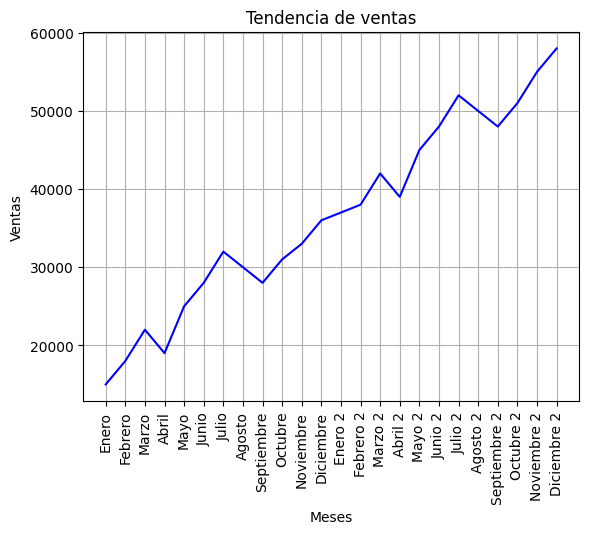

In [37]:
plt.plot(v_m["mes"], v_m["total_ventas"], color="blue")

plt.title("Tendencia de ventas")
plt.xlabel("Meses")
plt.ylabel("Ventas")

plt.xticks(rotation=90) 

plt.grid(True)

plt.show()